# $$Au..nom..de..Dieu..$$

In [103]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(1, 6, (10, 2))
data


array([[5.44059033, 1.01878532],
       [1.44980804, 1.55667292],
       [1.70668405, 2.95842188],
       [4.44295871, 4.7251515 ],
       [1.14673427, 5.45828446],
       [4.38263566, 3.70577678],
       [3.33225895, 2.22907626],
       [4.52758917, 2.57617853],
       [2.02675434, 4.28979351],
       [2.40705434, 1.95022317]])

In [104]:
# محاسبه ماتريس کوواريانس
mean_data = np.mean(data, axis=0)
data_centered = data - mean_data
cov_matrix = np.cov(data_centered.T)

cov_matrix

array([[ 2.3476528 , -0.57907169],
       [-0.57907169,  2.11613052]])

In [105]:
# استخراج ويژگي‌هاي اصلي (Eigenvalues و Eigenvectors)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(eigenvalues)
print("...")
print(eigenvectors)

[2.8224208  1.64136252]
...
[[ 0.77331414  0.63402306]
 [-0.63402306  0.77331414]]


In [106]:

# انتخاب بردار ويژه‌اي که بيشترين واريانس را دارد (اولين مولفه اصلي)
principal_component = eigenvectors[:, np.argmax(eigenvalues)]

# پروجکشن داده‌ها روي خط PCA
projected_data = np.dot(data_centered, principal_component)

principal_component, projected_data


(array([ 0.77331414, -0.63402306]),
 array([ 3.10643192, -0.32072958, -1.0108249 , -0.01497234, -3.02881251,
         0.58468607,  0.7086771 ,  1.41297201, -1.60743034,  0.17000258]))

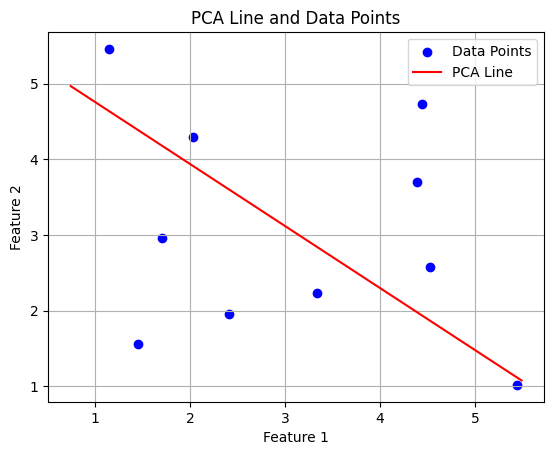

PCA line points in 1D array (projections):
[ 3.10643192 -0.32072958 -1.0108249  -0.01497234 -3.02881251  0.58468607
  0.7086771   1.41297201 -1.60743034  0.17000258]


(array([3.08630679, 3.04683643]),
 np.float64(-3.0288125113036193),
 array([ 0.77331414, -0.63402306]))

In [107]:

# ذخيره‌سازي داده‌ها در يک آرايه يک‌بعدي (پروجکشن‌ها)
pca_line_points_1d = projected_data

# رسم داده‌ها و خط PCA
# تعيين محدوده خط PCA
pca_start = np.min(projected_data) # شروع خط PCA
pca_end = np.max(projected_data) # پايان خط PCA

# رسم داده‌ها
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')

# رسم خط PCA
# براي اينکار، از داده‌هاي پروجکشن استفاده مي‌کنيم و خط را مي‌سازيم
line_start = mean_data + pca_start * principal_component
line_end = mean_data + pca_end * principal_component

plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], color='red', label='PCA Line')

# نمايش توضيحات
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('PCA Line and Data Points')

# نمايش تصوير
plt.grid(True)
plt.show()

# نمايش داده‌هاي پروجکت شده
print("PCA line points in 1D array (projections):")
print(pca_line_points_1d)
mean_data, pca_start, principal_component

In [108]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

pca_sklearn = PCA(n_components=1)
pca_sklearn.fit(data)

PCA(n_components=1)

In [109]:
projected_data_sklearn = pca_sklearn.transform(data)
projected_data_sklearn

array([[ 3.10643192],
       [-0.32072958],
       [-1.0108249 ],
       [-0.01497234],
       [-3.02881251],
       [ 0.58468607],
       [ 0.7086771 ],
       [ 1.41297201],
       [-1.60743034],
       [ 0.17000258]])

In [110]:
my_pca = projected_data
my_pca

array([ 3.10643192, -0.32072958, -1.0108249 , -0.01497234, -3.02881251,
        0.58468607,  0.7086771 ,  1.41297201, -1.60743034,  0.17000258])

In [111]:
mse = mean_squared_error(projected_data_sklearn, my_pca)
mse

1.0494422359621428e-31

In [112]:
acc = accuracy_score(np.round(projected_data_sklearn.flatten()), np.round(my_pca.flatten()))
acc

1.0

## Accuracy 100%

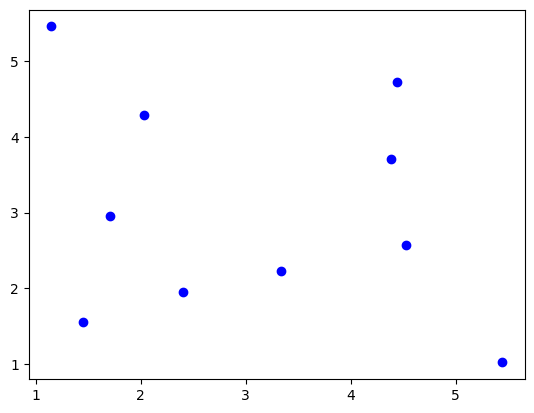

In [113]:
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')

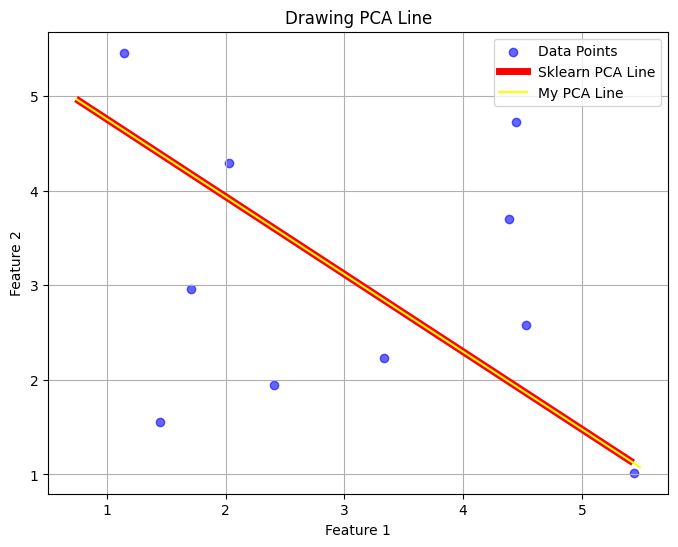

In [117]:
# رسم PCA
direction = pca_sklearn.components_[0] # جهت اولين مؤلفه اصلي

# ايجاد نقاطي براي رسم خط PCA*
t = np.linspace(-3, 3, 100) # بازه مقادير براي رسم خط
line_pca = mean_data + t[:, np.newaxis] * direction # محاسبه نقاط روي خط PCA

# رسم داده‌هاي اصلي و خط اوليه PCA
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Data Points", color='blue')
plt.plot(line_pca[:, 0], line_pca[:, 1], color='red', linewidth=5, label="Sklearn PCA Line")
plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], color='yellow', label='My PCA Line')


# تنظيمات نمودار
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Drawing PCA Line")
plt.legend()
plt.grid()
plt.show()
